<a href="https://colab.research.google.com/github/PauloFernandes26/AD2526/blob/main/AD2526_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup, Version check and Common imports

# Python ≥ 3.7 is required
import sys
assert sys.version_info >= (3, 7)


# TensorFlow ≥ 2.8 is required
import tensorflow as tf
from packaging import version

assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Common imports
import numpy as np
import os

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

print('Python version: ', sys.version_info)
print('TF version: ', tf.__version__)
print('Keras version: ', keras.__version__)
print('GPU is', 'available' if tf.config.list_physical_devices('GPU') else 'NOT AVAILABLE')

Python version:  sys.version_info(major=3, minor=12, micro=12, releaselevel='final', serial=0)
TF version:  2.19.0
Keras version:  3.10.0
GPU is available


**1. Obtaining and Splitting the Dataset into 3 Sets (Train, Test, Validation)**


In [2]:

# Load CIFAR100 dataset from keras datasets:
# https://keras.io/api/datasets/cifar100/
# https://www.cs.toronto.edu/~kriz/cifar.html

# The load_data() method creates train and test sets. The parameter label_mode specifies the category labels: 'fine' or 'coarse'
# In this class we will adopt the coarse classification, corresponding to 20 categories

from keras.datasets import cifar100
from sklearn.model_selection import train_test_split

(train_images_full, train_labels_full), (test_images, test_labels) = cifar100.load_data(label_mode = 'coarse')

train_labels_full = train_labels_full.squeeze()
test_labels = test_labels.squeeze()


# We further divide the original train datasets into train and validation datasets
train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images_full, train_labels_full,
    test_size=0.1,
    random_state=42,
    stratify=train_labels_full
)

# Normalize data to interval [0, 1]

train_images = train_images / 255.0
valid_images = valid_images / 255.0
test_images = test_images / 255.0


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:

# Complete this section
# Confirm the dimensions of all tensors previously created

# PLACE CODE HERE

print("Train images shape: ", train_images.shape)
print("Train labels shape: ", train_labels.shape)

print("Validation images shape: ", valid_images.shape)
print("Validation labels shape: ", valid_labels.shape)

print("Test images shape: ", test_images.shape)
print("Test labels shape: ", test_labels.shape)

print("\nData types:")
print("Train images dtype:", train_images.dtype)
print("Train labels dtype:", train_labels.dtype)

print("\nValue range (after normalization):")
print("Train images min:", train_images.min(), "max:", train_images.max())



Train images shape:  (45000, 32, 32, 3)
Train labels shape:  (45000,)
Validation images shape:  (5000, 32, 32, 3)
Validation labels shape:  (5000,)
Test images shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)

Data types:
Train images dtype: float64
Train labels dtype: int64

Value range (after normalization):
Train images min: 0.0 max: 1.0


**Questions:**

1. What is the shape of the tensors? These dimensions correspond to what?

2. How many elements does each of these sets have?

3. Why do we need three sets?

**2. Visualizing Some Examples**

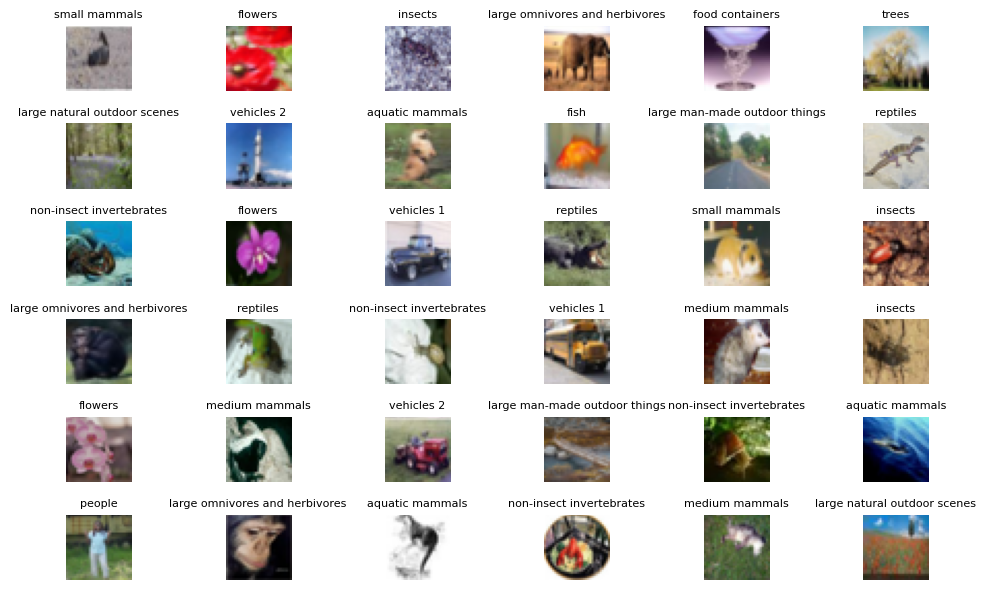

In [6]:
# Visualize a few examples

coarse_names = [
    "aquatic mammals", "fish", "flowers", "food containers",
    "fruit and vegetables", "household electrical devices",
    "household furniture", "insects", "large carnivores",
    "large man-made outdoor things", "large natural outdoor scenes",
    "large omnivores and herbivores", "medium mammals",
    "non-insect invertebrates", "people", "reptiles",
    "small mammals", "trees", "vehicles 1", "vehicles 2"
]

n_rows = 6
n_cols = 6

# Change the value of start to visualize different examples
start = 7

plt.figure(figsize=(n_cols * 2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_images[index + start])
        plt.axis('off')
        plt.title(coarse_names[train_labels[index + start]], fontsize=8)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


**3. Linear Feed-Forward NN**

In [8]:
# Build a feed-forward NN with Keras Sequential API: https://keras.io/api/models/

# This linear version does not have hidden layers
# 1. It has an input layer to receive information
# 2. It has final layer with the SoftMax activation function and the number of units should match the number of classes
# Complete the missing details:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

linearModel = keras.Sequential([
    # Input layer
    layers.Input(shape=[32,32,3]),

    # No hidden layers
    layers.Flatten(),

    # Final layer
    layers.Dense(20, activation='softmax')

])



**Question:**

Explain all the details of the NN that was just created:
1. Number of input nodes
2. Number of output nodes
3. Selection of activation functions


In [9]:
# Summary of the linear network architecture

linearModel.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        61,460 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,460 (240.08 KB)

 Trainable params: 61,460 (240.08 KB)

 Non-trainable params: 0 (0.00 B)

**Question:**

1. How many weights has the NN?

2. How were these weights initialized?



In [10]:
# Model compilation: https://keras.io/api/models/model_training_apis/
# Three components have to be defined:
# 1. the Optimizer to be used in training
# 2. The loss function
# 3. The evaluation metric

linearModel.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=["accuracy"])



In [11]:
# Model training
# Hyper-parameters: batch size and epochs
# Validation datasets can also be provided

# It returns a history object.
# Its History.history attribute is a record of training loss values and metrics values at successive epochs,
# as well as validation loss values and validation metrics values (if applicable).

history = linearModel.fit(train_images, train_labels, batch_size=32, epochs=20,
                    validation_data=(valid_images, valid_labels))



Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1491 - loss: 2.7741 - val_accuracy: 0.1588 - val_loss: 2.8016
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2140 - loss: 2.5657 - val_accuracy: 0.1726 - val_loss: 2.7532
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2283 - loss: 2.5267 - val_accuracy: 0.1798 - val_loss: 2.7277
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2370 - loss: 2.5044 - val_accuracy: 0.1842 - val_loss: 2.7106
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2429 - loss: 2.4885 - val_accuracy: 0.1886 - val_loss: 2.6982
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2470 - loss: 2.4760 - val_accuracy: 0.1930 - val_loss: 2.6887
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2504 - loss: 2.4657 - val_accuracy: 0.1962 - val_loss: 2.6813
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2530 - loss: 2.4570 - 

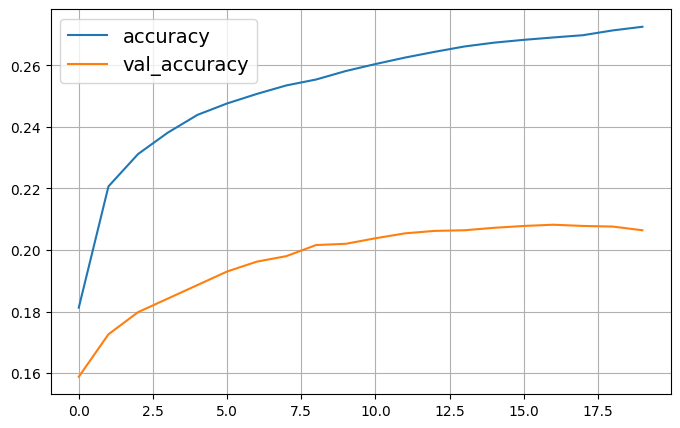

In [12]:

# Plot the evolution of the accuracy metrics

import pandas as pd

x = pd.DataFrame(history.history, columns = ['accuracy', 'val_accuracy'])
x.plot(figsize=(8, 5))
plt.grid(True)
plt.show()



In [13]:

# Evaluating the generalization ability of the linear model
# The test set will be used in this step
# Classification of a set of examples can be performed using the evaluate() method:  https://keras.io/api/models/model_training_apis/

test_loss, test_acc = linearModel.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2095 - loss: 2.6447
Test Accuracy: 0.20509999990463257


**Questions:**

1. How do you analyze these results?

2. What is the difference between the validation and test datasets?



**4. Shallow Feed-forward NN**

In [14]:
# Build a feed-forward NN with Keras Sequential API: https://keras.io/api/models/

# This shallow version has a single hidden layer
# 1. It has an input layer to receive information
# 2. It has one hidden layer with 128 units and sigmoid activation function
# 3. It has final layer with the SoftMax activation function and the number of units should match the number of classes

# Complete the missing details:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)


shallowModel = keras.Sequential([
    # Input layer
    layers.Input(shape=[32,32,3]),
    layers.Flatten(),

    # One hidden layer
    layers.Dense(128, activation='sigmoid'),

    # Final layer
    layers.Dense(20, activation='softmax')

])




In [15]:
# Summary of the shallow network architecture

shallowModel.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395,924 (1.51 MB)

 Trainable params: 395,924 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Layer detailed analysis

hidden1 = shallowModel.layers[1]
weights, biases = hidden1.get_weights()

print('Layer ', hidden1.name)
print('Weights with shape ', weights.shape, ' :\n', weights)
print('Biases with shape ', biases.shape, ' :\n', biases)


Layer  dense
Weights with shape  (3072, 128)  :
 [[-0.00428446  0.00929908 -0.01235899 ... -0.0252632  -0.03433205
  -0.01854977]
 [-0.00745253 -0.01928168 -0.01218651 ...  0.00645543 -0.0316801
  -0.01393984]
 [-0.01152198 -0.02573308  0.00124019 ...  0.00377375 -0.0243263
   0.00679933]
 ...
 [-0.02210106 -0.01301657  0.01436309 ... -0.01512906  0.03525248
  -0.01932761]
 [-0.02986464 -0.01574441 -0.03530111 ... -0.04138759  0.00616447
  -0.01716495]
 [ 0.00045714 -0.01474716  0.03295647 ... -0.01679288 -0.03802408
   0.03519227]]
Biases with shape  (128,)  :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
# Shallow model compiling and training

shallowModel.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=["accuracy"])

history = shallowModel.fit(train_images, train_labels, batch_size=32, epochs=20,
                    validation_data=(valid_images, valid_labels))




Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1181 - loss: 2.8984 - val_accuracy: 0.1784 - val_loss: 2.7051
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1909 - loss: 2.6732 - val_accuracy: 0.2098 - val_loss: 2.6173
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2120 - loss: 2.5960 - val_accuracy: 0.2222 - val_loss: 2.5685
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2235 - loss: 2.5490 - val_accuracy: 0.2316 - val_loss: 2.5343
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2336 - loss: 2.5149 - val_accuracy: 0.2356 - val_loss: 2.5090
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2411 - loss: 2.4891 - val_accuracy: 0.2410 - val_loss: 2.4897
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2463 - loss: 2.4689 - val_accuracy: 0.2450 - val_loss: 2.4742
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2510 - loss: 2.4523 - 

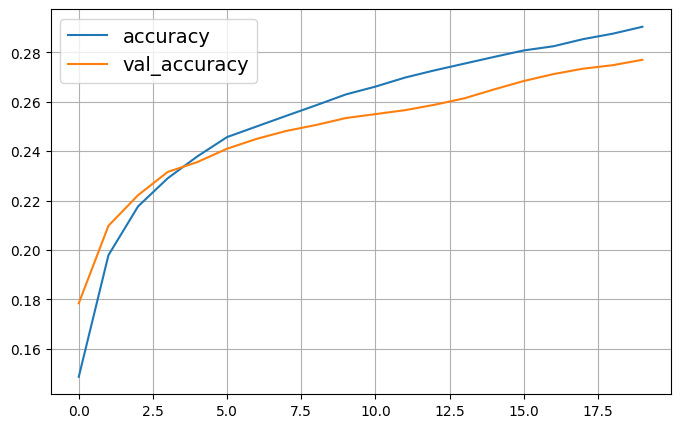

In [18]:

x = pd.DataFrame(history.history, columns = ['accuracy', 'val_accuracy'])
x.plot(figsize=(8, 5))
plt.grid(True)
plt.show()


In [19]:
# Evaluating the generalization ability of the shallow model
# The test set will be used in this step
# Classification of a set of examples can be performed using the evaluate() method:  https://keras.io/api/models/model_training_apis/

test_loss, test_acc = shallowModel.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2757 - loss: 2.3688
Test Accuracy: 0.27469998598098755


**Question:**

1. How do you analyze these results?

**5. Deep Feed-forward NN**

In [20]:
# Build a feed-forward NN with Keras Sequential API: https://keras.io/api/models/

# This deep version has two hidden layers
# 1. It has an input layer to receive information
# 2. The first hidden layer has 128 units with the sigmoid activation function
# 3. The second hidden layer has 64 units with the sigmoid activation function
# 3. It has final layer with the SoftMax activation function and the number of units should match the number of classes

# Complete the missing details:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)


deepModel = keras.Sequential([
    # Input layer
    layers.Input(shape=[32,32,3]),
    layers.Flatten(),

    # Two hidden layer
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),


    # Final layer
    layers.Dense(20, activation='softmax')

])


In [21]:
# Summary of the deep network architecture

deepModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,900 (1.54 MB)

 Trainable params: 402,900 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Deep model compiling and training

deepModel.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=["accuracy"])



history = deepModel.fit(train_images, train_labels, batch_size=32, epochs=20,
                    validation_data=(valid_images, valid_labels))


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0650 - loss: 3.0108 - val_accuracy: 0.1118 - val_loss: 2.9572
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1258 - loss: 2.9428 - val_accuracy: 0.1362 - val_loss: 2.8961
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1460 - loss: 2.8739 - val_accuracy: 0.1534 - val_loss: 2.8181
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1602 - loss: 2.7972 - val_accuracy: 0.1622 - val_loss: 2.7577
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1684 - loss: 2.7414 - val_accuracy: 0.1720 - val_loss: 2.7155
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1758 - loss: 2.7023 - val_accuracy: 0.1824 - val_loss: 2.6830
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1815 - loss: 2.6720 - val_accuracy: 0.1888 - val_loss: 2.6562
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1873 - loss: 2.6463 - 

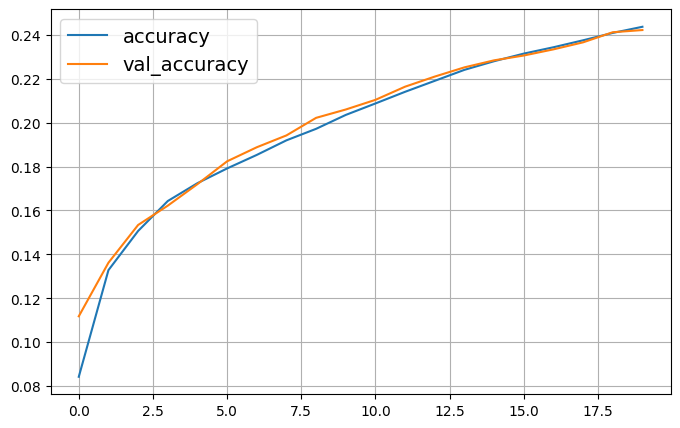

In [23]:

x = pd.DataFrame(history.history, columns = ['accuracy', 'val_accuracy'])
x.plot(figsize=(8, 5))
plt.grid(True)
plt.show()


In [24]:
# Evaluating the generalization ability of the deep model
# The test set will be used in this step
# Classification of a set of examples can be performed using the evaluate() method:  https://keras.io/api/models/model_training_apis/

test_loss, test_acc = deepModel.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2350 - loss: 2.4787
Test Accuracy: 0.2370000034570694


**Question:**

1. Analyze and compare all results that were obtained with the three models

**6. Model Saving**

In [25]:
# Save the model. All models details (architecture, configuration, weights) can be saved to disk.
# The method save creates a folder with all the information

deepModel.save("Modelo_Aula2.keras")

# The model can be later retrieved with the method load_model()


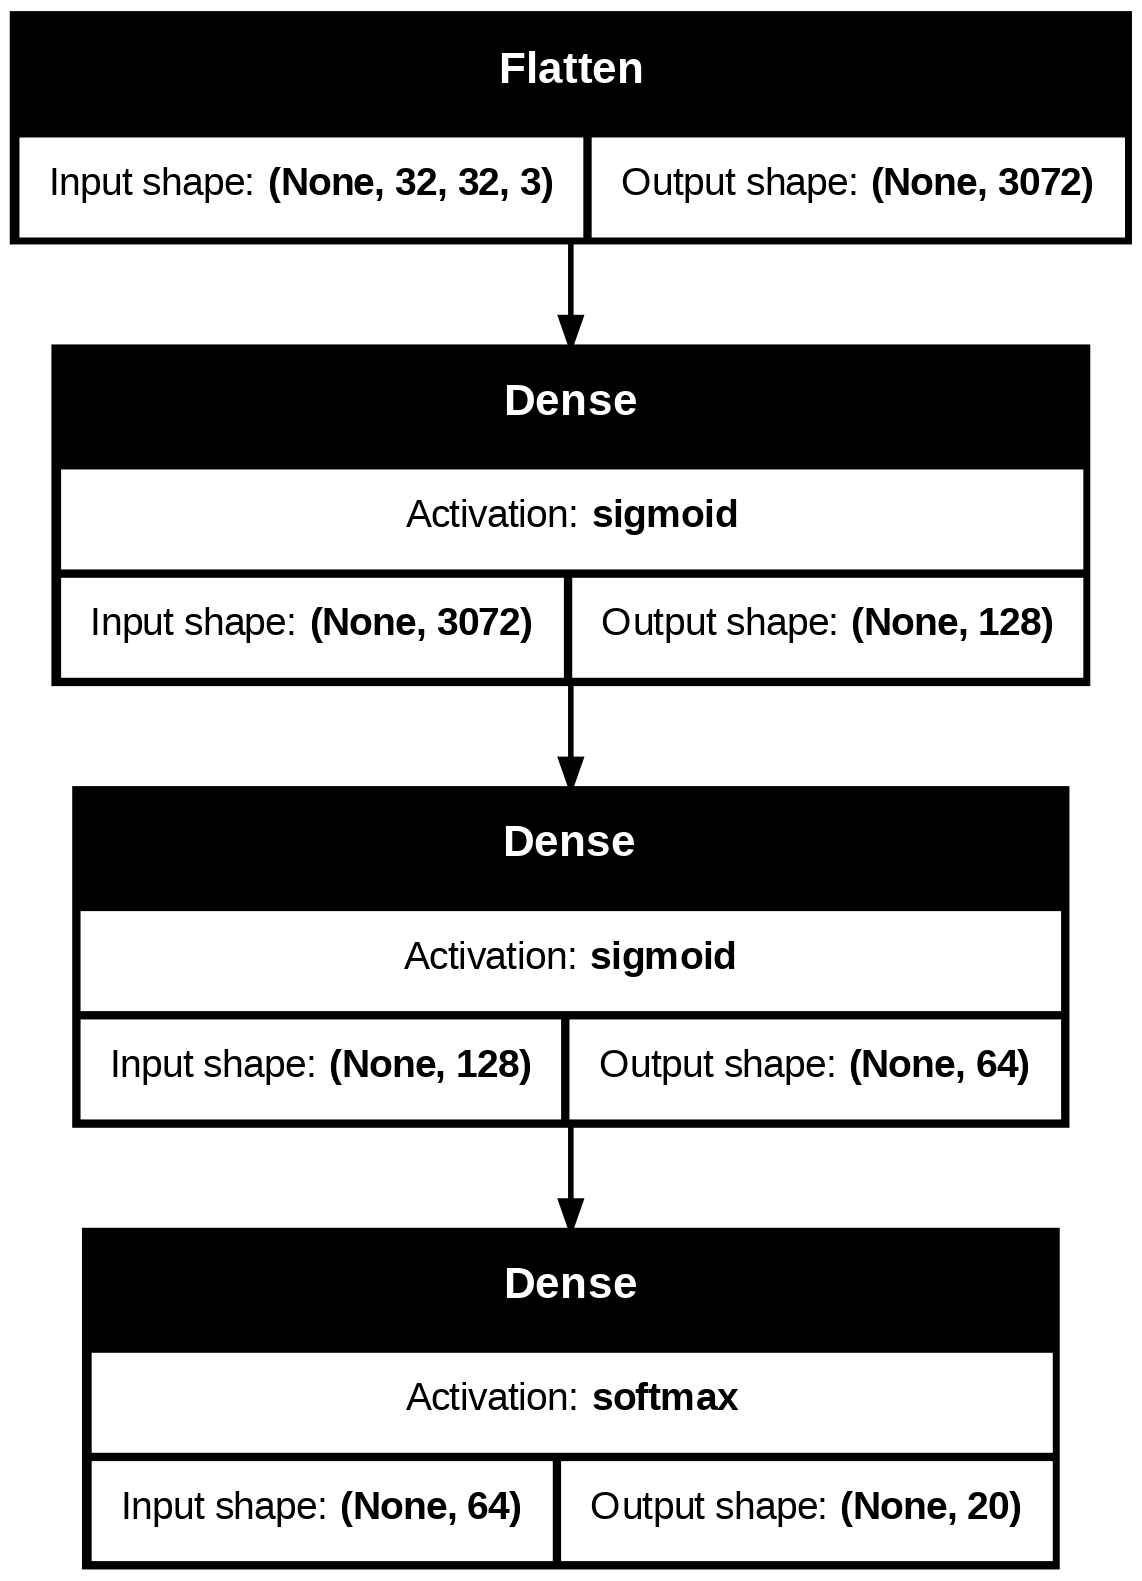

In [26]:
# Convert model to png and save it to a file

dot_img_file = 'deep.png'
keras.utils.plot_model(deepModel, to_file=dot_img_file, show_shapes=True, show_layer_activations=True)



**7. Changes in the Architecture of the Neural Network**

The performance of the neural network is poor. It is mandatory to perform changes, aiming at improving its performance. There are several possibilities that can be tested:

The proposed neural network may not be the most suitable for this problem. Change its architecture (number of layers / number of neurons per layer) and document how performance changes. The following constraints apply:
  *    The Keras Sequential API must be used
  *    Only Flatten and Dense layers can be used
  *    Activation functions: Sigmoid, Tanh, SoftMax
  *    Optimizer: SGD
  *    Budget: 2 million weights

Perform some tests, document how results change and present a simple analysis of the outcome.

Your target is to achieve 35% accuracy on the test dataset







In [27]:
# Code goes here

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

newModel = keras.Sequential([
    # Input layer
    layers.Input(shape=[32,32,3]),
    layers.Flatten(),

    # Hidden layers
    # Two hidden layer
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),


    # Final layer
    layers.Dense(20, activation='softmax')

])


# (Opcional mas recomendado) confirmar nº de parâmetros
newModel.summary()

# Compile
newModel.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.05, momentum=0.9, nesterov=True),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


# Train
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-4),
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=6, restore_best_weights=True),
]

history = newModel.fit(
    train_images, train_labels,
    validation_data=(valid_images, valid_labels),
    epochs=60,
    batch_size=128,
    callbacks=callbacks,
    verbose=2
)


# Evaluate
test_loss, test_acc = newModel.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,900 (1.54 MB)

 Trainable params: 402,900 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
352/352 - 4s - 11ms/step - accuracy: 0.1450 - loss: 2.7609 - val_accuracy: 0.2066 - val_loss: 2.5907 - learning_rate: 0.0500
Epoch 2/60
352/352 - 1s - 3ms/step - accuracy: 0.2156 - loss: 2.5336 - val_accuracy: 0.2344 - val_loss: 2.4720 - learning_rate: 0.0500
Epoch 3/60
352/352 - 1s - 3ms/step - accuracy: 0.2470 - loss: 2.4440 - val_accuracy: 0.2574 - val_loss: 2.4054 - learning_rate: 0.0500
Epoch 4/60
352/352 - 1s - 3ms/step - accuracy: 0.2651 - loss: 2.3814 - val_accuracy: 0.2730 - val_loss: 2.3592 - learning_rate: 0.0500
Epoch 5/60
352/352 - 1s - 4ms/step - accuracy: 0.2801 - loss: 2.3300 - val_accuracy: 0.2866 - val_loss: 2.3240 - learning_rate: 0.0500
Epoch 6/60
352/352 - 1s - 4ms/step - accuracy: 0.2927 - loss: 2.2859 - val_accuracy: 0.2962 - val_loss: 2.3014 - learning_rate: 0.0500
Epoch 7/60
352/352 - 2s - 5ms/step - accuracy: 0.3047 - loss: 2.2483 - val_accuracy: 0.3000 - val_loss: 2.2811 - learning_rate: 0.0500
Epoch 8/60
352/352 - 1s - 3ms/step - accuracy: 0.3151 